In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import r2_score

Part 1: Data Exploration and Visualization

In [108]:
# calculate and report basic statistics for each variable (mean, median, standard deviation)
df = pd.read_csv('HW2.csv')
stat_table = []
for name in df.columns:
    if df[name].dtype == 'int64':
        # print(name)
        stat_arr = [df[name].mean(), df[name].median(), df[name].std()]
        stat_table.append(stat_arr)
        # print(stat_arr)
stat_table = pd.DataFrame(stat_table, columns=['mean','median','stdev'],index=['price','area','bedrooms','bathrooms','stories','parking'])
stat_table

,mean,median,stdev
price,4.766729e+06,4340000.0,1.870440e+06
area,5.150541e+03,4600.0,2.170141e+03
bedrooms,2.965138e+00,3.0,7.380639e-01
bathrooms,1.286239e+00,1.0,5.024696e-01
stories,1.805505e+00,2.0,8.674925e-01
parking,6.935780e-01,0.0,8.615858e-01


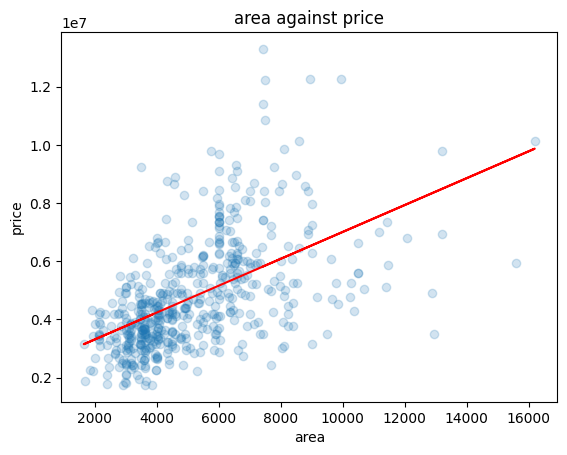

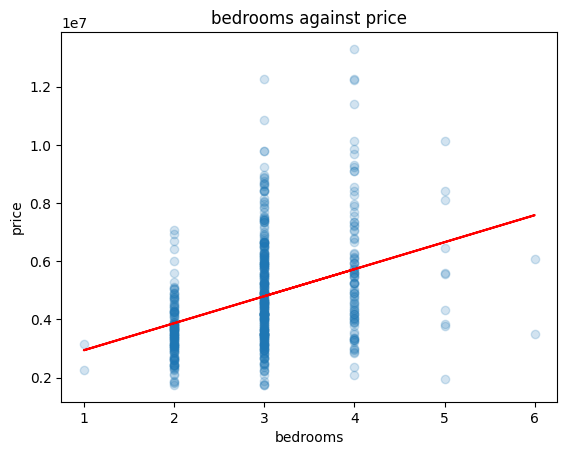

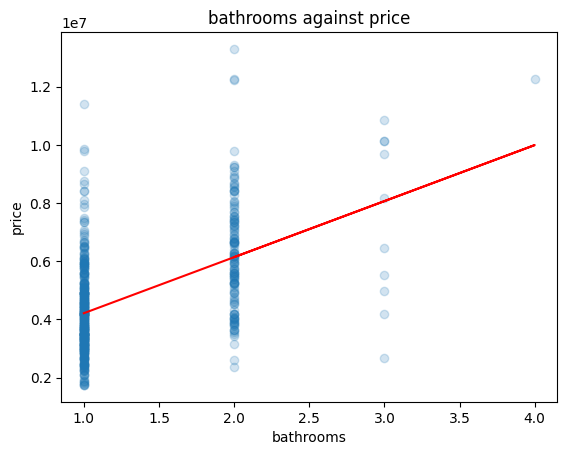

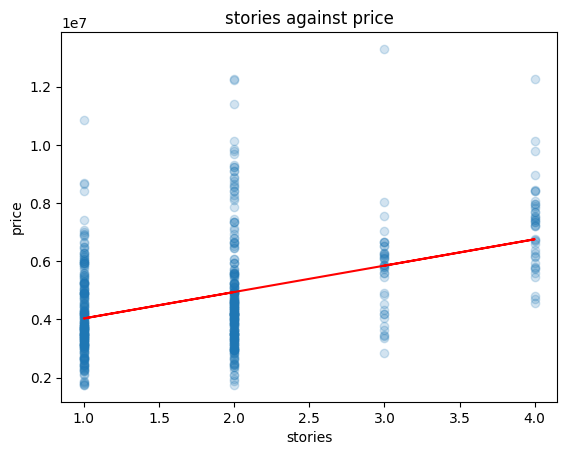

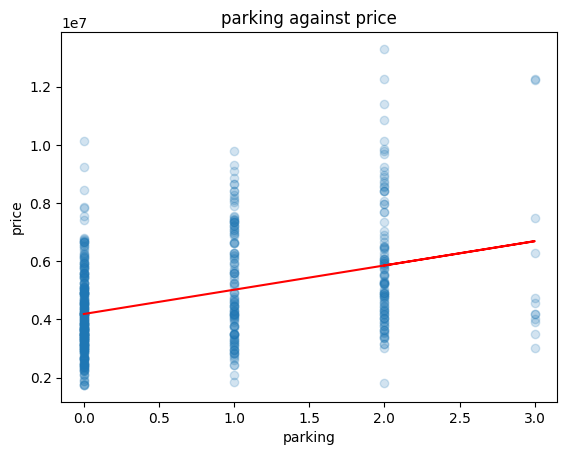

In [109]:
indep_var = ['area','bedrooms','bathrooms','stories','parking']
for var in indep_var:
    plt.figure()
    plt.title(var + ' against price')
    plt.xlabel(var)
    plt.ylabel('price')
    plt.scatter(df[var],df['price'],alpha=0.2)

    slope, intercept = np.polyfit(df[var], df['price'], 1)
    line = slope * df[var] + intercept
    plt.plot(df[var], line, color='red', label='Line of Best Fit')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,1,0,0,0,1,1,0
1,1,0,0,0,1,0,0
2,1,0,1,0,0,1,1
3,1,0,1,0,1,1,0
4,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...
540,1,0,1,0,0,0,2
541,0,0,0,0,0,0,1
542,1,0,0,0,0,0,2
543,0,0,0,0,0,0,0


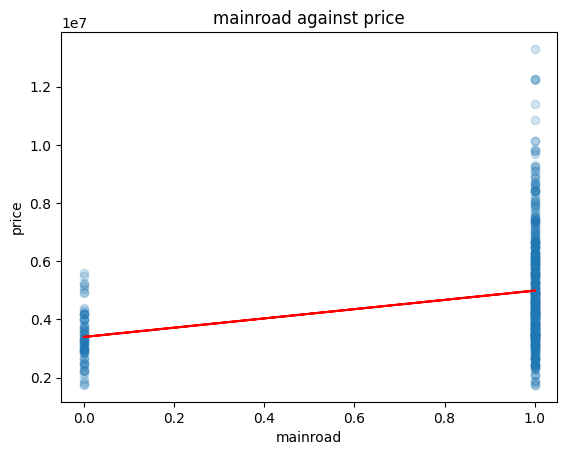

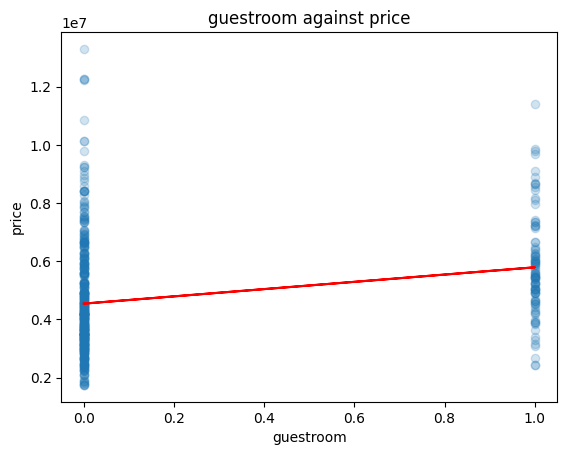

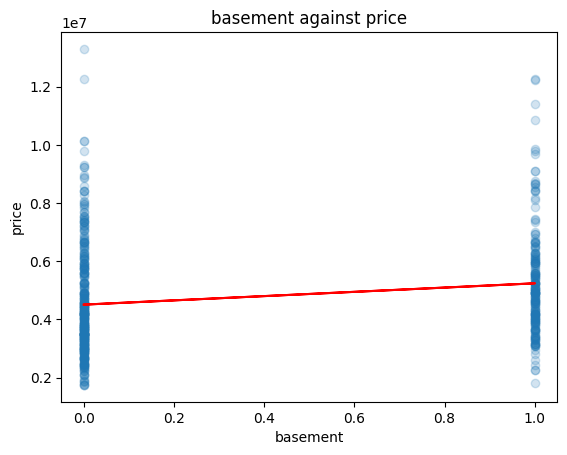

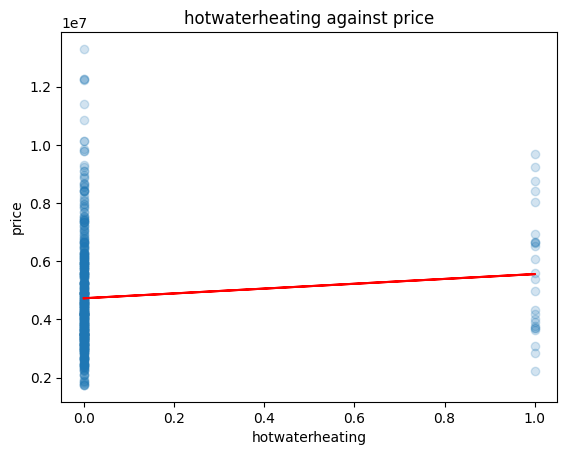

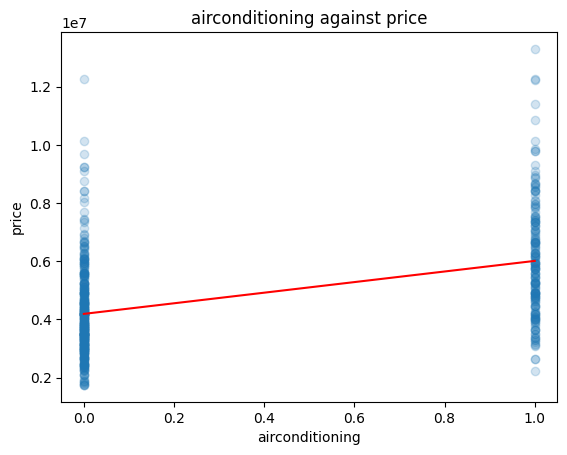

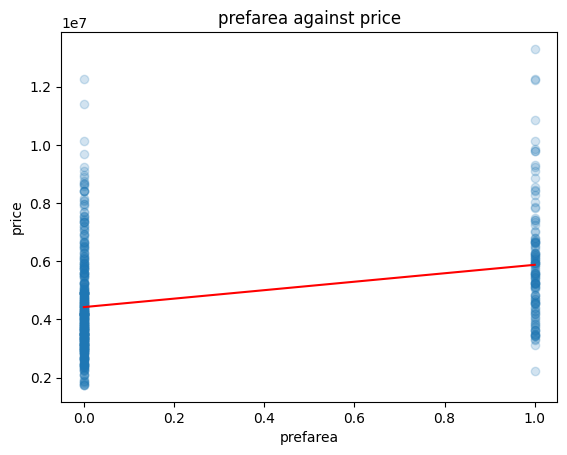

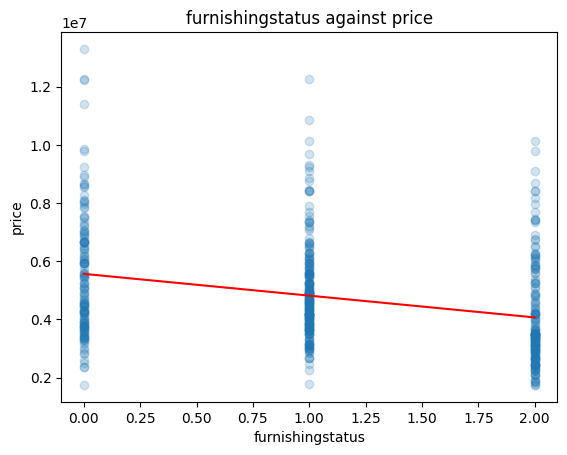

In [110]:
# plots of non-numerical variables against price
indep_var_str = []
for name in df.columns:
    if isinstance(df[name][0], str):
        indep_var_str.append(name)

df_2 = df[indep_var_str].copy()

for col in df_2.columns:
    df_2[col] = df_2[col].astype('category').cat.codes
    plt.figure(col)
    plt.title(col + ' against price')
    plt.xlabel(col)
    plt.ylabel('price')
    plt.scatter(df_2[col],df['price'],alpha=0.2)

    slope, intercept = np.polyfit(df_2[col], df['price'], 1)
    line = slope * df_2[col] + intercept
    plt.plot(df_2[col], line, color='red', label='Line of Best Fit')
df_2
# encoding
# mainroad: 1 = yes, 0 = no
# guestroom: 1 = yes, 0 = no
# basement: 1 = yes, 0 = no
# hotwaterheating: 1 = yes, 0 = no
# airconditioning: 1 = yes, 0 = no
# prefarea: 1 = yes, 0 = no
# furnishingstatus: 0 = furnished, 1 = semi-furnished, 2 = unfurnished


*Interpretation of Plots:*

The Area vs. Price plot depicts the range of values associated with the house price, but generally shows an upward trend in price as area increases (or a positive correlation between the variables). This can be more clearly represented by the Line of Best Fit in red, which has a positive slope. This trend can be visualized among the remainder of the numeric independent variables ('area','bedrooms','bathrooms','stories','parking'). As the number of bedrooms, bathrooms, stories, and parking spots increase, so does the corresponding house price. This positive correlation (given by the slope) can also be seen in the non-numeric categories (that were then encoding correspondingly); however, the trend isn't as clear due to the binary categorization of the variable (there usually are only two categories, resulting in a flatter slope). 


Part 2: Correlation Analysis

In [111]:
# calculate the pearson correlation coefficient between house price and each independent variable
# interpret the correlation coefficients -- which variable has the strongest correlation

df_pr = pd.concat([df[indep_var].copy(), df_2.copy()], axis=1)
corr_table = []
for col in df_pr.columns:
    corr, p = stats.pearsonr(df_pr[col], df['price'])
    temp_arr = [col, corr]
    corr_table.append(temp_arr)
df_corr = pd.DataFrame(corr_table, columns=['variable','pearson correlation coefficient'])
df_corr


,variable,pearson correlation coefficient
0,area,0.535997
1,bedrooms,0.366494
2,bathrooms,0.517545
3,stories,0.420712
4,parking,0.384394
5,mainroad,0.296898
6,guestroom,0.255517
7,basement,0.187057
8,hotwaterheating,0.093073
9,airconditioning,0.452954


Based on the Pearson Correlation Coefficients for all of the variables, area has the strongest correlation with price. Pearson correlation coefficients range from 0 to 1, with a coefficient closer to 1 indicating a stronger correlation and more linear relationship. Out of all the variables, area has the highest correlation coefficient of 0.5359. While the area variable has the largest Pearson coefficient, it still is in a moderate range that doesn't necessarily indicate direct correlation between the 2 variables (area and price). Therefore, we can hypothesize that this independent variable doesn't have an extremely confident predictive power, but shows some correlation with regards to price. 

Part 3: Linear Regression

In [123]:
# linear regression attempt with sklearn package

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(np.array(df['area']).reshape(-1,1),np.array(df['price']))
slope = model.coef_[0]
intercept = model.intercept_

print('slope: ' + str(slope))
print('intercept: ' + str(intercept))

slope: 461.9748942727834
intercept: 2387308.4823964303


R^2 score:  0.2872931546811469
Slope:  461.97489427278333
Intercept:  2387308.482396432


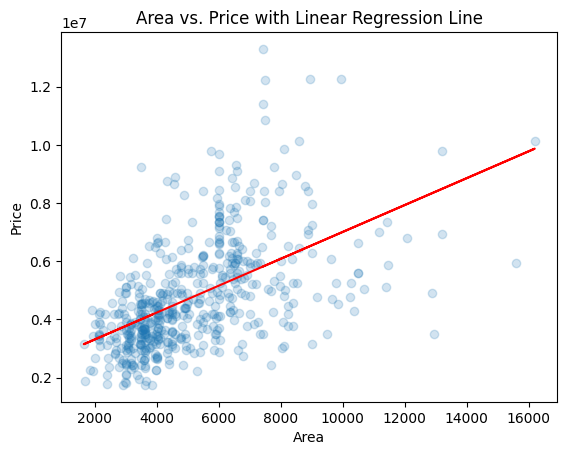

In [113]:
# area (strongest independent variable) vs price
# linear regression with least squares method
# plot regression line along with scatter plot of area vs price
# calculate r^2 value for model
# interpret meaning of slope and intercept in the context of house prices

# least squares method --> sum of (point - line prediction)^2 --> minimized

plt.figure()
plt.scatter(df['area'],df['price'], alpha=0.2,label='Data')
m, b = np.polyfit(df['area'], df['price'], 1)
y_pred = m * df['area'] + b
plt.plot(df['area'], y_pred, color='red', label='Line of Best Fit')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs. Price with Linear Regression Line')

r_2 = r2_score(df['price'], y_pred)
print('R^2 score: ', r_2)
print('Slope: ', m)
print('Intercept: ', b)

Based on the regression line for Area vs. Price, there was an R^2 score (or Goodness of Fit) 0.28. The regression line had a slope of 461.97 (area unit per dollar), and y-intercept of 2,387,308. Based on these two values, the regression line estimated that the baseline value of a home was $2,387,308, and increased at a rate of $461.97 per area unit. As the house area increased, so did the price at the given rate. 

Task 4: Residual Analysis

Text(0.5, 1.0, 'Residuals Visualization')

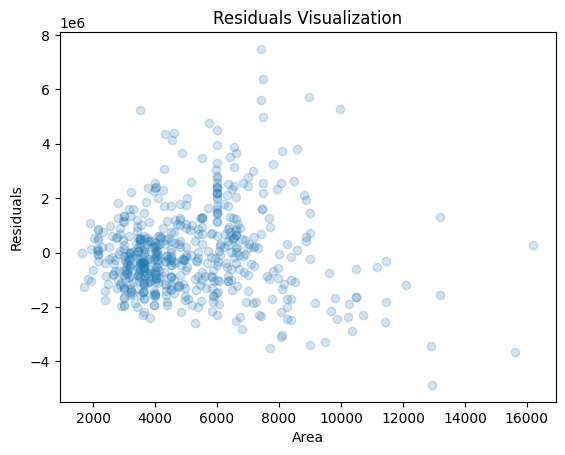

In [114]:
# calculate the residuals for your simple linear regression model
# create vidsualization of the residuals
# interpret this visualization

# residuals = difference between prices and predicted

residuals = df['price'] - y_pred
plt.scatter(df['area'], residuals, alpha=0.2)
plt.xlabel('Area')
plt.ylabel('Residuals')
plt.title('Residuals Visualization')

The residuals represent the difference between the actual home prices and the predicted prices based on the regression line. This visualization doesn't show a distinct pattern or trend, indicating that the regression line is well fitted to the data points. Most of the residual points also hover around the same range of values (-2 to 2), showing that there is little shift in the difference between the actual and predicted values over the course of the dataset.

Part 5: Linear Regression - all IVs

In [122]:
# perform linear regression using all independent variables
# compare the R^2 value of this model to the 1-IV linear regression model

X = df_pr[df_pr.columns]
y = df['price']

model_all = LinearRegression()
model_all.fit(X,y)

slope_all = model_all.coef_[0]
intercept_all = model_all.intercept_
r_2_all = model_all.score(X,y)

print('slope: ' + str(slope_all))
print('intercept: ' + str(intercept_all))
print('R^2: ' + str(r_2_all))
print('coefficients: ' + str(model_all.coef_))

X

slope: 243.90688726890784
intercept: 101866.51305205934
R^2: 0.680069137617004
coefficients: [ 2.43906887e+02  1.19474386e+05  9.88888287e+05  4.50391518e+05
  2.79785637e+05  4.23100741e+05  2.98030507e+05  3.57926360e+05
  8.72936027e+05  8.53633595e+05  6.47055599e+05 -2.13187781e+05]


,area,bedrooms,bathrooms,stories,parking,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,7420,4,2,3,2,1,0,0,0,1,1,0
1,8960,4,4,4,3,1,0,0,0,1,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1
3,7500,4,2,2,3,1,0,1,0,1,1,0
4,7420,4,1,2,2,1,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,2,1,0,1,0,0,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,0,1,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


The R^2 value of the all independent variable model compared to the simple linear regression model is higher, with a score of 0.68 (compared to 0.28). A higher R^2 value indicates a better fit of the regression line to the data points, showing that with added variables, more variance can be taken into account, providing more accurate predictions (in comparison to the simple linear regression model). This regression line had additional coefficients, one for each independent variable considered. Given that there were 12 independent variables, there were 12 coefficients. Each of the coefficients suggests (to some extent) that an increase in that variable corresponds to an increase in house price, with multiple variables increasing leading to a greater cumulative rise in price.

Part 6: Implement k-fold cross validation (for simple linear model)

In [125]:
from sklearn.model_selection import KFold, cross_val_score

cross_val_scores = cross_val_score(model, np.array(df['area']).reshape(-1,1),np.array(df['price']), cv=5, scoring='r2')

print('cross validation scores: ' + str(cross_val_scores))

cross validation scores: [ -4.48747915  -8.93725564 -15.94730772 -35.66059689 -22.62706961]


K-fold cross validation allows us to see how the model would perform on untested/unseen data. By splitting up the available dataset into folds, different subsections of the data is split into training and testing, allowing the model to predict on a range of datasets. Cross validation can assist with overfitting, but if the model isn't as accurate or capable of fitting to the data, the corresponding R^2 values from the cross validation may be much poorer than the general prediction. As seen with the cross-validation R^2 scores above, the goodness of fit of the model is much worse than the original simple linear regression model. Generally, k-fold cross validation acts as a check to ensure that model performance is able to perform well on both training data (data it's seen before) and testing data (unseen).